## Máster en Big Data y Data Science

### Metodologías de gestión y diseño de proyectos de big data



#### AP2 - Preparación de los datos

##### Importación de librerías

In [1]:
import pandas as pd
# from ydata_profiling import ProfileReport
import dtale as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

----

##### Lectura de los datasets

In [5]:
df_creditos = pd.read_csv("../data/raw/datos_creditos.csv", sep=";")
df_creditos.head(1)



,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,estado_credito,falta_pago
0,713061558.0,22,35000,3,123.0,ALQUILER,59000,PERSONAL,0.59,16.02,1,Y


In [6]:
df_tarjetas = pd.read_csv("../data/raw/datos_tarjetas.csv", sep=";")
df_tarjetas.head(1)

,id_cliente,antiguedad_cliente,estado_civil,estado_cliente,gastos_ult_12m,genero,limite_credito_tc,nivel_educativo,nivel_tarjeta,operaciones_ult_12m,personas_a_cargo
0,713061558.0,36.0,CASADO,ACTIVO,1088.0,M,4010.0,UNIVERSITARIO_COMPLETO,Blue,24.0,2.0


In [7]:
print(df_creditos.columns)
print(df_tarjetas.columns)

Index(['id_cliente', 'edad', 'importe_solicitado', 'duracion_credito',
       'antiguedad_empleado', 'situacion_vivienda', 'ingresos',
       'objetivo_credito', 'pct_ingreso', 'tasa_interes', 'estado_credito',
       'falta_pago'],
      dtype='object')
Index(['id_cliente', 'antiguedad_cliente', 'estado_civil', 'estado_cliente',
       'gastos_ult_12m', 'genero', 'limite_credito_tc', 'nivel_educativo',
       'nivel_tarjeta', 'operaciones_ult_12m', 'personas_a_cargo'],
      dtype='object')


---
#### Aplicación de transformaciones

**Operaciones a realizar**

1. Selección de columnas
2. Filtrado de filas
3. Construcción de atributos
4. Integración de datasets
5. Formateo definitivo

----

##### Descripción de los datasets

In [8]:
def reporte_descripcion_dataset(df):
    columnas = df.columns
    print("Columnas del dataset:\n")
    for col in columnas:
        print(col)
    print(f"\nCantidad de filas: {df.shape[0]}")

In [9]:
print("Descripción del dataset 'datos_creditos'")
reporte_descripcion_dataset(df_creditos)

Descripción del dataset 'datos_creditos'
Columnas del dataset:

id_cliente
edad
importe_solicitado
duracion_credito
antiguedad_empleado
situacion_vivienda
ingresos
objetivo_credito
pct_ingreso
tasa_interes
estado_credito
falta_pago

Cantidad de filas: 10127


In [10]:
print("Descripción del dataset 'datos_tarjetas'")
reporte_descripcion_dataset(df_tarjetas)

Descripción del dataset 'datos_tarjetas'
Columnas del dataset:

id_cliente
antiguedad_cliente
estado_civil
estado_cliente
gastos_ult_12m
genero
limite_credito_tc
nivel_educativo
nivel_tarjeta
operaciones_ult_12m
personas_a_cargo

Cantidad de filas: 10127


INTEGRO LAS DOS BASES DE DATOS

In [13]:

df_integrado = pd.merge(df_creditos, df_tarjetas, on='id_cliente', how='inner')
coincidencias = df_integrado.shape[0]

In [14]:
df_integrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           10127 non-null  float64
 1   edad                 10127 non-null  int64  
 2   importe_solicitado   10127 non-null  int64  
 3   duracion_credito     10127 non-null  int64  
 4   antiguedad_empleado  9790 non-null   float64
 5   situacion_vivienda   10127 non-null  object 
 6   ingresos             10127 non-null  int64  
 7   objetivo_credito     10127 non-null  object 
 8   pct_ingreso          10127 non-null  float64
 9   tasa_interes         9215 non-null   float64
 10  estado_credito       10127 non-null  int64  
 11  falta_pago           10127 non-null  object 
 12  antiguedad_cliente   10127 non-null  float64
 13  estado_civil         10127 non-null  object 
 14  estado_cliente       10127 non-null  object 
 15  gastos_ult_12m       10127 non-null 

In [15]:
# Eliminar filas con valores faltantes
df_integrado = df_integrado.dropna()
df_integrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8902 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           8902 non-null   float64
 1   edad                 8902 non-null   int64  
 2   importe_solicitado   8902 non-null   int64  
 3   duracion_credito     8902 non-null   int64  
 4   antiguedad_empleado  8902 non-null   float64
 5   situacion_vivienda   8902 non-null   object 
 6   ingresos             8902 non-null   int64  
 7   objetivo_credito     8902 non-null   object 
 8   pct_ingreso          8902 non-null   float64
 9   tasa_interes         8902 non-null   float64
 10  estado_credito       8902 non-null   int64  
 11  falta_pago           8902 non-null   object 
 12  antiguedad_cliente   8902 non-null   float64
 13  estado_civil         8902 non-null   object 
 14  estado_cliente       8902 non-null   object 
 15  gastos_ult_12m       8902 non-null   float

Limpieza de los datos

In [19]:
# Se filtran las filas con algún error detectado
df_integrado = df_integrado[df_integrado['edad'] < 90]

# Otro filtro posible:
df_integrado= df_integrado[df_integrado['antiguedad_empleado'] <50]

# # También por las reglas del negocio
# df_integrado= df_integrado[df_integrado['regla_pct_ingresos'] != 'err']

df_integrado.shape[0]

8897

Despues de esta limpieza quede con 8897 filas o clientes a analizar.

Transformación de atributos

In [21]:
# Columna: estado_civil
cambios_estado_civil = {
    'CASADO' : 'C',
    'SOLTERO' : 'S',
    'DESCONOCIDO' : 'N',
    'DIVORCIADO' : 'D',
}

estado_civil_N = df_integrado.loc[:, ('estado_civil')].map(cambios_estado_civil).rename('estado_civil_N')
df_final = pd.concat([estado_civil_N, df_integrado], axis=1)


# Sobre este resultado será necesario eliminar las columnas auxiliares

df_final = df_final.drop(["estado_civil"], axis=1)

df_final.head()

,estado_civil_N,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,...,falta_pago,antiguedad_cliente,estado_cliente,gastos_ult_12m,genero,limite_credito_tc,nivel_educativo,nivel_tarjeta,operaciones_ult_12m,personas_a_cargo
1,C,768805383.0,21,1000,2,5.0,PROPIA,9600,EDUCACIÓN,0.10,...,N,39.0,ACTIVO,1144.0,M,12691.0,SECUNDARIO_COMPLETO,Blue,42.0,3.0
2,S,818770008.0,25,5500,3,1.0,HIPOTECA,9600,SALUD,0.57,...,N,44.0,ACTIVO,1291.0,F,8256.0,UNIVERSITARIO_COMPLETO,Blue,33.0,5.0
3,C,713982108.0,23,35000,2,4.0,ALQUILER,65500,SALUD,0.53,...,N,36.0,ACTIVO,1887.0,M,3418.0,UNIVERSITARIO_COMPLETO,Blue,20.0,3.0
4,C,710821833.0,24,35000,4,8.0,ALQUILER,54400,SALUD,0.55,...,Y,54.0,ACTIVO,1314.0,M,9095.0,DESCONOCIDO,Blue,26.0,1.0
5,N,769911858.0,21,2500,2,2.0,PROPIA,9900,INVERSIONES,0.25,...,N,34.0,ACTIVO,1171.0,F,3313.0,SECUNDARIO_COMPLETO,Blue,20.0,4.0


In [22]:
df_final = df_final.drop(["id_cliente"], axis=1)

----

##### Gráficos de interés

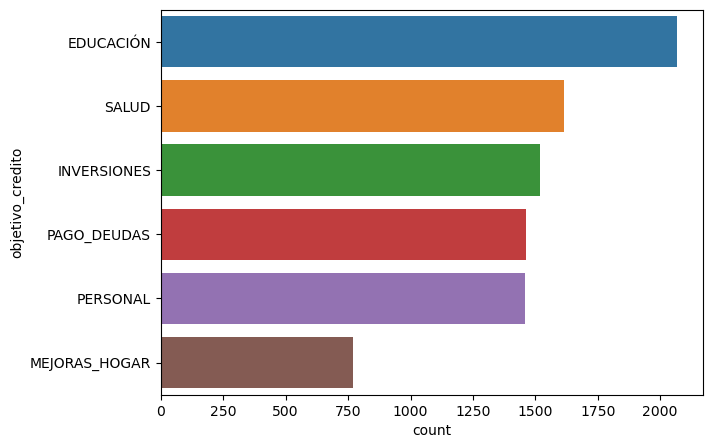

In [24]:
plt.figure(figsize=(7,5))
sns.countplot(y=df_final['objetivo_credito'], order=df_final['objetivo_credito'].value_counts().index)
plt.show()

DIAGRAMA DE CAJAS PARA OBSERVAR LA DISTRIBUCIÓN DE LAS VARIABLES DEPENDIENTES CON LA VARIABLE OBJETIVO "falta_pago":

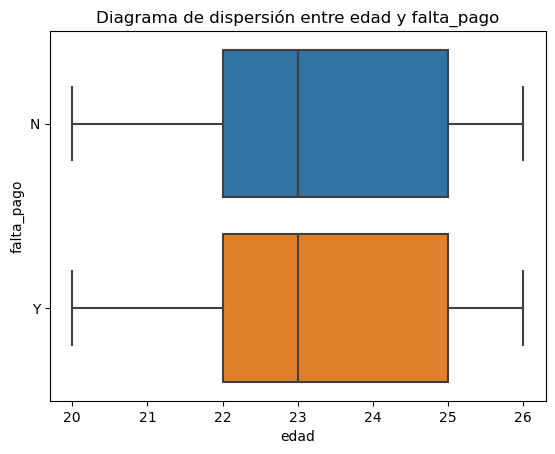

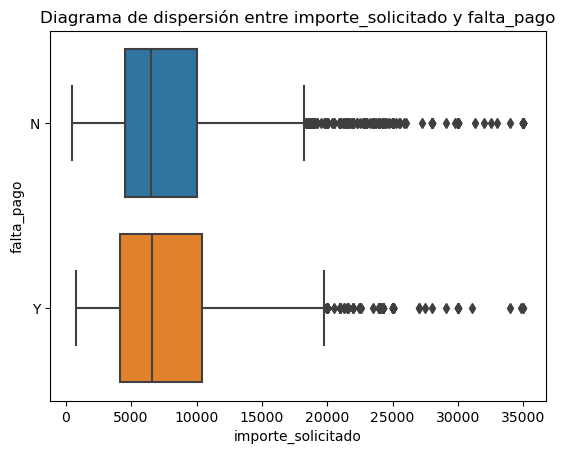

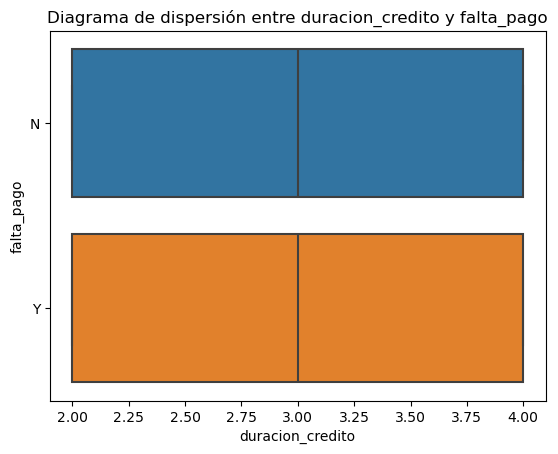

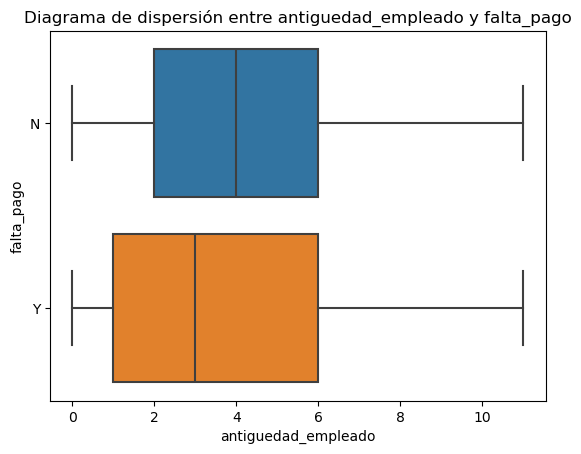

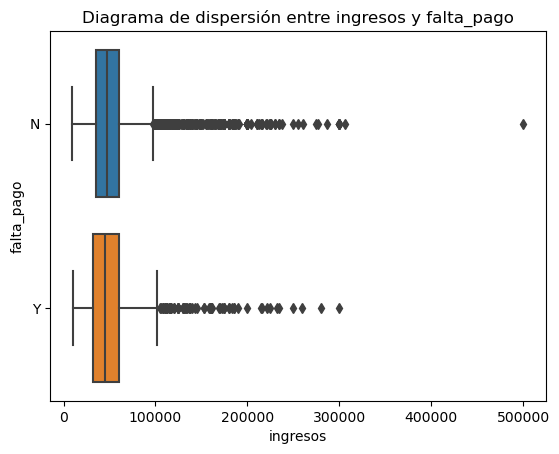

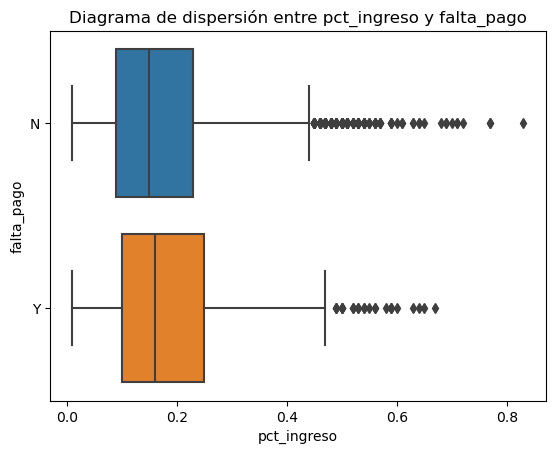

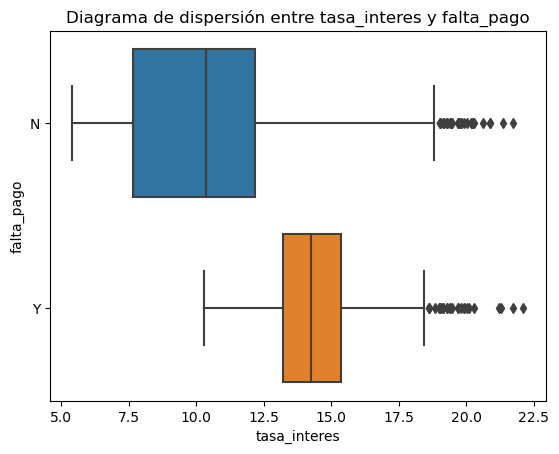

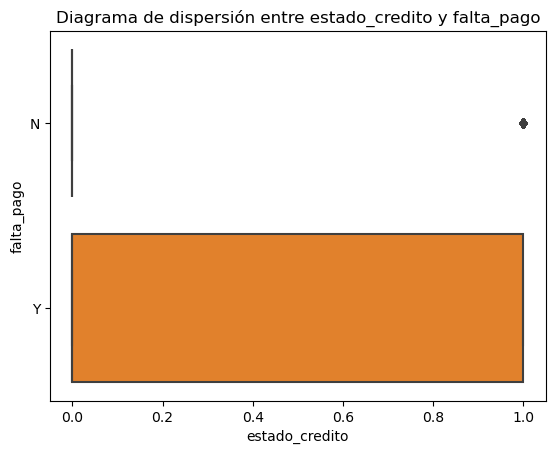

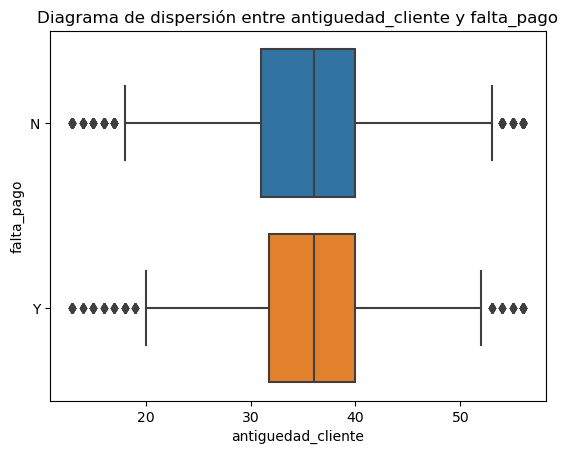

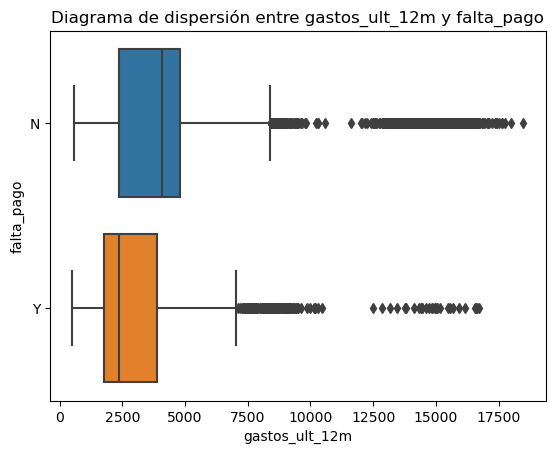

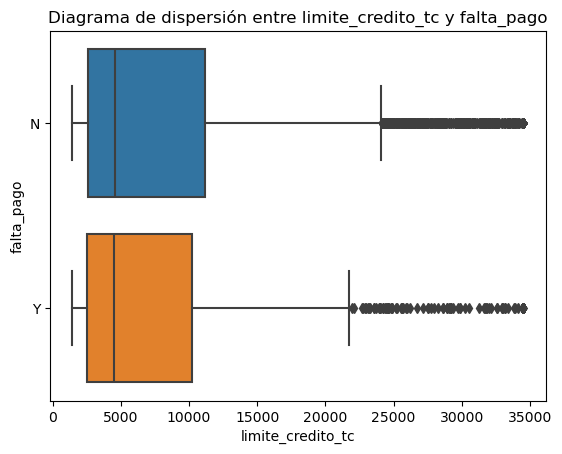

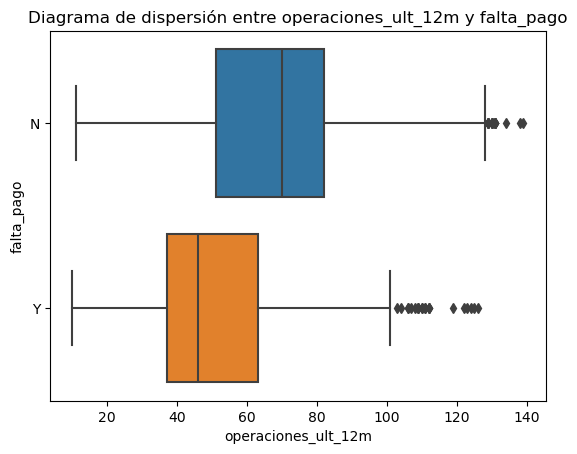

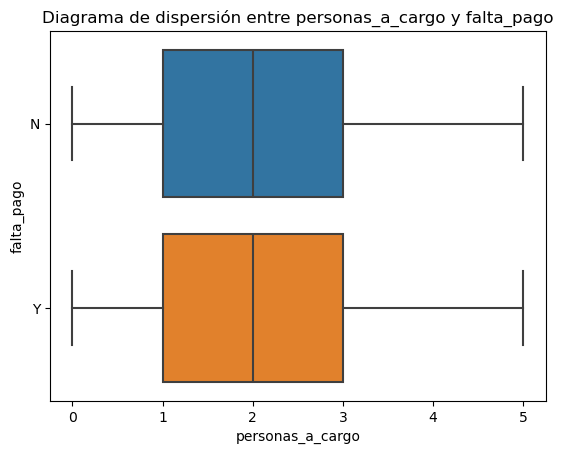

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
df_numeric = df_final.select_dtypes(include=['number'])


for variable in df_numeric.columns:
    if variable != 'falta_pago':
        sns.boxplot(data=df_final, x=variable, y='falta_pago')
        plt.title(f'Diagrama de dispersión entre {variable} y falta_pago')
        plt.xlabel(variable)
        plt.ylabel('falta_pago')
        plt.show()

In [ ]:
df_numeric.describe()

SELECCIÓN DE DATOS - MATRIX DE CORRELACION PARA ELIMINAR VARIABLES CORRELACIONADAS DE FORMA FUERTE:

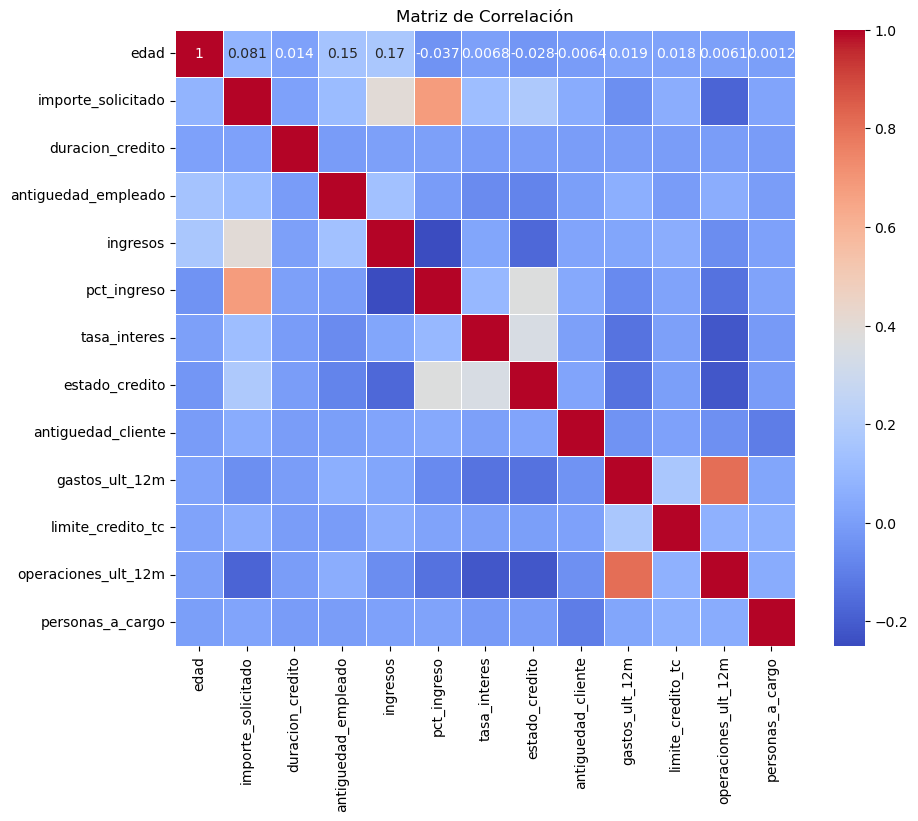

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

correlacion_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

In [27]:
correlacion_matrix

,edad,importe_solicitado,duracion_credito,antiguedad_empleado,ingresos,pct_ingreso,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,limite_credito_tc,operaciones_ult_12m,personas_a_cargo
edad,1.000000,0.081255,0.013825,0.148964,0.167394,-0.036567,0.006759,-0.028422,-0.006377,0.018595,0.017922,0.006124,0.001231
importe_solicitado,0.081255,1.000000,0.010365,0.112804,0.395595,0.682334,0.125317,0.181954,0.050779,-0.052765,0.055606,-0.179417,0.020360
duracion_credito,0.013825,0.010365,1.000000,-0.007837,0.005711,0.008243,-0.007179,-0.001037,-0.002074,-0.001485,-0.001623,-0.001292,-0.007889
antiguedad_empleado,0.148964,0.112804,-0.007837,1.000000,0.136822,-0.007300,-0.061989,-0.086848,0.002746,0.058209,-0.009189,0.057789,-0.001363
ingresos,0.167394,0.395595,0.005711,0.136822,1.000000,-0.249748,0.026112,-0.170429,0.019970,0.024679,0.054249,-0.054914,0.013814
pct_ingreso,-0.036567,0.682334,0.008243,-0.007300,-0.249748,1.000000,0.096868,0.371737,0.039613,-0.067912,0.018117,-0.141475,0.016695
tasa_interes,0.006759,0.125317,-0.007179,-0.061989,0.026112,0.096868,1.000000,0.348175,0.004414,-0.134303,0.006624,-0.218128,-0.012184
estado_credito,-0.028422,0.181954,-0.001037,-0.086848,-0.170429,0.371737,0.348175,1.000000,0.020462,-0.139477,0.001690,-0.218475,-0.009207
antiguedad_cliente,-0.006377,0.050779,-0.002074,0.002746,0.019970,0.039613,0.004414,0.020462,1.000000,-0.036661,0.012080,-0.048284,-0.103509
gastos_ult_12m,0.018595,-0.052765,-0.001485,0.058209,0.024679,-0.067912,-0.134303,-0.139477,-0.036661,1.000000,0.166013,0.807273,0.028338


In [29]:
df_numeric.describe()

,edad,importe_solicitado,duracion_credito,antiguedad_empleado,ingresos,pct_ingreso,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,limite_credito_tc,operaciones_ult_12m,personas_a_cargo
count,8897.000000,8897.000000,8897.000000,8897.000000,8897.000000,8897.000000,8897.000000,8897.000000,8897.000000,8897.000000,8897.000000,8897.000000,8897.000000
mean,23.539171,8175.483309,2.994155,3.901203,50853.851523,0.176012,11.017500,0.245251,35.892323,4427.064853,8610.879162,64.979319,2.352816
std,1.511816,5755.820486,0.817668,2.844085,28822.870831,0.109457,3.194385,0.430260,7.992288,3425.279649,9068.391002,23.521975,1.300919
min,20.000000,500.000000,2.000000,0.000000,9600.000000,0.010000,5.420000,0.000000,13.000000,510.000000,1438.300000,10.000000,0.000000
25%,22.000000,4500.000000,2.000000,2.000000,34000.000000,0.090000,7.900000,0.000000,31.000000,2164.000000,2546.000000,45.000000,1.000000
50%,23.000000,6500.000000,3.000000,4.000000,47000.000000,0.150000,10.990000,0.000000,36.000000,3912.000000,4543.000000,67.000000,2.000000
75%,25.000000,10000.000000,4.000000,6.000000,60000.000000,0.230000,13.470000,0.000000,40.000000,4747.000000,11060.000000,81.000000,3.000000
max,26.000000,35000.000000,4.000000,11.000000,500000.000000,0.830000,22.110000,1.000000,56.000000,18484.000000,34516.000000,139.000000,5.000000


In [40]:
df_final['estado_credito'].value_counts()

estado_credito
0    6715
1    2182
Name: count, dtype: int64

In [42]:
df_final['falta_pago'].value_counts()

falta_pago
N    7333
Y    1564
Name: count, dtype: int64

LIMPIEZA OUTLIERS O ATIPICOS :

In [33]:
outlier_umbral = 3


outlier_rows = []

# Itera a ttraves de las columnas del data train_sin_variables_corr_normalized
for column in df_numeric.columns:
    # Calcula el IQR para la columna actual
    Q1 = df_integrado[column].quantile(0.25)
    Q3 = df_integrado[column].quantile(0.75)
    IQR = Q3 - Q1

    # Verifica si cada fila tiene valores atípicos en la columna actual
    column_outliers = (df_integrado[column] < (Q1 - outlier_umbral * IQR)) | (df_integrado[column] > (Q3 + outlier_umbral * IQR))

    # Agrega las filas con valores atípicos de la columna actual a la lista
    outlier_rows.extend(df_integrado[column_outliers].index)

# Elimina duplicados en la lista de filas con valores atípicos
outlier_rows = list(set(outlier_rows))
print("indices de outliers a eliminar:", outlier_rows)

print("cantidad_filas_eliminar: ", str(len(outlier_rows)))
print("%_filas_eliminar: ", str((len(outlier_rows)/len(df_integrado.drop(columns="falta_pago")))*100))


indices de outliers a eliminar: [8193, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 8207, 24, 25, 26, 8214, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 8222, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 8235, 51, 52, 53, 54, 55, 56, 8242, 58, 8250, 60, 61, 63, 64, 66, 67, 68, 69, 72, 73, 74, 75, 76, 77, 78, 79, 80, 8265, 82, 83, 8276, 86, 8279, 88, 89, 91, 92, 8283, 94, 8285, 97, 98, 99, 100, 101, 102, 103, 104, 107, 109, 110, 111, 112, 113, 8303, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 8331, 148, 149, 150, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 8358, 175, 176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 8380, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 8395, 8397, 211, 8401, 214, 215, 216, 217, 219, 220, 221, 8413, 223, 224, 225, 226, 

Se puede observar que el 32% de los elementos se clasificaron como datos atipicos o raros  por tanto no se eleminaran dado que los muchos registros a perder , se puede decir que hasta el 5% es una cantidad razonable.

Atributos numéricos que se discretizan

In [43]:
df_final.columns


Index(['estado_civil_N', 'edad', 'importe_solicitado', 'duracion_credito',
       'antiguedad_empleado', 'situacion_vivienda', 'ingresos',
       'objetivo_credito', 'pct_ingreso', 'tasa_interes', 'estado_credito',
       'falta_pago', 'antiguedad_cliente', 'estado_cliente', 'gastos_ult_12m',
       'genero', 'limite_credito_tc', 'nivel_educativo', 'nivel_tarjeta',
       'operaciones_ult_12m', 'personas_a_cargo'],
      dtype='object')

In [44]:
df_final02= df_final.copy()

In [46]:
# Antiguedad del empleado

etiquetas_a_e = ['menor_5', '5_a_10', 'mayor_10']
rangos_a_e = [0, 4, 10, 50]
valor_para_nan = 'NA'
antiguedad_empleados_N = pd.cut(df_final02['antiguedad_empleado'], 
                                bins=rangos_a_e, 
                                labels=etiquetas_a_e,
                                right=False).cat.add_categories(valor_para_nan).fillna(valor_para_nan)

antiguedad_empleados_N.value_counts()

# edad

etiquetas_e = ['menor_25', '25_a_30']
rangos_e = [0, 24, 50]
edad_N = pd.cut(df_final['edad'], 
                                bins=rangos_e, 
                                labels=etiquetas_e)

edad_N.value_counts()

# pct_ingreso

etiquetas_p_i = ['hasta_20', '20_a_40', '40_a_60', 'mayor_60']
rangos_p_i = [0, 0.19, 0.39, 0.60, 0.99]
pct_ingreso_N = pd.cut(df_final02['pct_ingreso'], 
                                bins=rangos_p_i, 
                                labels=etiquetas_p_i)

pct_ingreso_N.value_counts()

# ingresos

etiquetas_i = ['hasta_20k', '20k_a_50k', '50k_a_100k', 'mayor_100k']
rangos_i = [0, 19999, 49999, 99999, 999999]
ingresos_N = pd.cut(df_final02['ingresos'], 
                                bins=rangos_i, 
                                labels=etiquetas_i)

ingresos_N.value_counts()

# tasa_interes

etiquetas_t_i = ['hasta_7p', '7p_a_15p', '15p_a_20p', 'mayor_20p']
rangos_t_i = [0, 6.99, 14.99, 19.99, 100]
tasa_interes_N = pd.cut(df_final02['tasa_interes'], 
                                bins=rangos_t_i, 
                                labels=etiquetas_t_i)

tasa_interes_N.value_counts()

# antiguedad_cliente

etiquetas_a_c = ['menor_2y', '2y_a_4y', 'mayor_4y']
rangos_a_c = [0, 24, 48, 100]
antiguedad_cliente_N = pd.cut(df_final02['antiguedad_cliente'], 
                                bins=rangos_a_c, 
                                labels=etiquetas_a_c)

antiguedad_cliente_N.value_counts()

# limite_credito_tc

etiquetas_l_tc = ['menor_3k', '3k_a_5k', '5k_a_10k', 'mayor_10k']
rangos_l_tc = [0, 2999, 4999, 9999, 100000]
limite_credito_tc_N = pd.cut(df_final02['limite_credito_tc'], 
                                bins=rangos_l_tc, 
                                labels=etiquetas_l_tc)

limite_credito_tc_N.value_counts()

# gastos_ult_12m

etiquetas_g_u12 = ['menor_1k', '2k_a_4k', '4k_a_6k', '6k_a_8k', '8k_a_10k', 'mayor_10k']
rangos_g_u12 = [0, 999, 3999, 5999, 7999, 9999, 100000]
gastos_ult_12m_N = pd.cut(df_final02['gastos_ult_12m'], 
                                bins=rangos_g_u12, 
                                labels=etiquetas_g_u12)

gastos_ult_12m_N.value_counts()

# operaciones_ult_12m

etiquetas_o_u12 = ['menor_15', '15_a_30', '30_a_50', '50_a_75', '75_a_100', 'mayor_100']
rangos_o_u12 = [0, 14, 29, 49, 74, 99, 1000]
operaciones_ult_12m_N = pd.cut(df_final02['operaciones_ult_12m'], 
                                bins=rangos_o_u12, 
                                labels=etiquetas_o_u12)



In [47]:
df_final02.columns

Index(['estado_civil_N', 'edad', 'importe_solicitado', 'duracion_credito',
       'antiguedad_empleado', 'situacion_vivienda', 'ingresos',
       'objetivo_credito', 'pct_ingreso', 'tasa_interes', 'estado_credito',
       'falta_pago', 'antiguedad_cliente', 'estado_cliente', 'gastos_ult_12m',
       'genero', 'limite_credito_tc', 'nivel_educativo', 'nivel_tarjeta',
       'operaciones_ult_12m', 'personas_a_cargo'],
      dtype='object')

In [49]:
col_eliminar_final = [
              'edad',
              'antiguedad_empleado',
              'antiguedad_cliente', 
              'ingresos',
              'pct_ingreso', 
              'tasa_interes',
              #'regla_pct_ingresos',
              'gastos_ult_12m', 
              'limite_credito_tc', 
              'operaciones_ult_12m',
              #'id_cliente'
              ]

df_final02.drop(col_eliminar_final, inplace=True, axis=1)


df_final03 = pd.concat([operaciones_ult_12m_N, gastos_ult_12m_N, limite_credito_tc_N, antiguedad_cliente_N, tasa_interes_N, ingresos_N, pct_ingreso_N, antiguedad_empleados_N, edad_N, df_final02], axis=1)
df_final03.head(5)


,operaciones_ult_12m,gastos_ult_12m,limite_credito_tc,antiguedad_cliente,tasa_interes,ingresos,pct_ingreso,antiguedad_empleado,edad,estado_civil_N,...,duracion_credito,situacion_vivienda,objetivo_credito,estado_credito,falta_pago,estado_cliente,genero,nivel_educativo,nivel_tarjeta,personas_a_cargo
1,30_a_50,2k_a_4k,mayor_10k,2y_a_4y,7p_a_15p,hasta_20k,hasta_20,5_a_10,menor_25,C,...,2,PROPIA,EDUCACIÓN,0,N,ACTIVO,M,SECUNDARIO_COMPLETO,Blue,3.0
2,30_a_50,2k_a_4k,5k_a_10k,2y_a_4y,7p_a_15p,hasta_20k,40_a_60,menor_5,25_a_30,S,...,3,HIPOTECA,SALUD,1,N,ACTIVO,F,UNIVERSITARIO_COMPLETO,Blue,5.0
3,15_a_30,2k_a_4k,3k_a_5k,2y_a_4y,15p_a_20p,50k_a_100k,40_a_60,5_a_10,menor_25,C,...,2,ALQUILER,SALUD,1,N,ACTIVO,M,UNIVERSITARIO_COMPLETO,Blue,3.0
4,15_a_30,2k_a_4k,5k_a_10k,mayor_4y,7p_a_15p,50k_a_100k,40_a_60,5_a_10,menor_25,C,...,4,ALQUILER,SALUD,1,Y,ACTIVO,M,DESCONOCIDO,Blue,1.0
5,15_a_30,2k_a_4k,3k_a_5k,2y_a_4y,7p_a_15p,hasta_20k,20_a_40,menor_5,menor_25,N,...,2,PROPIA,INVERSIONES,1,N,ACTIVO,F,SECUNDARIO_COMPLETO,Blue,4.0


MODELADO:

Vuelvo dummi las variables categoricas :

In [50]:
data_completa_sin_nulos_dummi = pd.get_dummies(df_final03)
data_completa_sin_nulos_dummi

,importe_solicitado,duracion_credito,estado_credito,personas_a_cargo,operaciones_ult_12m_menor_15,operaciones_ult_12m_15_a_30,operaciones_ult_12m_30_a_50,operaciones_ult_12m_50_a_75,operaciones_ult_12m_75_a_100,operaciones_ult_12m_mayor_100,...,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO,nivel_tarjeta_Blue,nivel_tarjeta_Gold,nivel_tarjeta_Platinum,nivel_tarjeta_Silver
1,1000,2,0,3.0,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
2,5500,3,1,5.0,False,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
3,35000,2,1,3.0,False,True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
4,35000,4,1,1.0,False,True,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
5,2500,2,1,4.0,False,True,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,7000,4,0,1.0,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
10123,9575,3,0,2.0,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,False,False
10124,9600,2,1,1.0,False,False,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
10125,9600,2,1,2.0,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True


MODELOS CON LA DATA TRANSFORMADA 

In [63]:
import mlflow
import mlflow.sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Configurar la URI de seguimiento de MLflow
mlflow.set_tracking_uri("../data/raw/mlruns")  
experiment_name = "experimento_1"  # Nombre del experimento

# Crear un experimento si no existe
mlflow.set_experiment(experiment_name)


# Dividir los datos en conjunto de entrenamiento y prueba
X = data_completa_sin_nulos_dummi.drop(columns=['falta_pago_Y', "falta_pago_N"])  
y = data_completa_sin_nulos_dummi['falta_pago_Y']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos  arbol de decision, logistico y maquina de soporte vectorial para clasificar si pagará o no :
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100),
    "LogisticRegression": LogisticRegression(),
    "SVM": SVC()
}

best_accuracy = 0.0
best_model_name = None
best_model_params = None

# Iterar sobre los modelos
for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        # Entrenar el modelo
        model.fit(X_train, y_train)
        
        # Hacer predicciones en el conjunto de prueba
        y_pred = model.predict(X_test)
        
        # Calcular la precisión
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{model_name} Accuracy: {accuracy}")
        
        # Registrar los parámetros y métricas con MLflow
        mlflow.log_params(model.get_params())
        mlflow.log_metric("accuracy", accuracy)
        
        # Guardar el modelo si es el mejor hasta ahora
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model_name = model_name
            best_model_params = model.get_params()
            mlflow.sklearn.log_model(model, f"{model_name}_model")

print(f"Best Model: {best_model_name} with Accuracy: {best_accuracy}")
print(f"Best Model Parameters: {best_model_params}")



2024/03/20 05:35:16 INFO mlflow.tracking.fluent: Experiment with name 'experimento_1' does not exist. Creating a new experiment.


RandomForest Accuracy: 0.8831460674157303
LogisticRegression Accuracy: 0.8612359550561798
SVM Accuracy: 0.8224719101123595
Best Model: RandomForest with Accuracy: 0.8831460674157303
Best Model Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


----

### Prueba de despliegue (utilzando datos nuevos)

In [54]:
datos_nuevos = pd.read_csv('../data/raw//datos_nuevos.csv', sep=';')
datos_nuevos.head(5)

,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,...,antiguedad_cliente,estado_civil,estado_cliente,gastos_ult_12m,genero,limite_credito_tc,nivel_educativo,nivel_tarjeta,operaciones_ult_12m,personas_a_cargo
0,708510993,22,4000,4,3.0,HIPOTECA,62000,PERSONAL,0.06,6.76,...,47,SOLTERO,ACTIVO,15478.0,F,4905.0,UNIVERSITARIO_INCOMPLETO,Blue,109.0,1.0
1,708512051,25,10000,2,3.0,ALQUILER,120000,INVERSIONES,0.08,9.32,...,18,CASADO,ACTIVO,3950.0,M,1663.0,UNIVERSITARIO_COMPLETO,Blue,82.0,3.0
2,708513258,23,1700,2,2.0,HIPOTECA,45000,SALUD,0.04,14.72,...,29,CASADO,ACTIVO,3078.0,M,4323.0,UNIVERSITARIO_INCOMPLETO,Blue,58.0,1.0
3,708514512,25,7200,4,0.0,ALQUILER,71604,PAGO_DEUDAS,0.10,10.95,...,29,CASADO,ACTIVO,4314.0,F,3809.0,UNIVERSITARIO_INCOMPLETO,Blue,81.0,2.0
4,708515472,26,5000,3,5.0,HIPOTECA,52000,PAGO_DEUDAS,0.10,10.59,...,36,CASADO,ACTIVO,4216.0,F,4712.0,SECUNDARIO_COMPLETO,Blue,82.0,1.0


Ahora hacemos las mismas transformaciones en la data nueva con el fin de que tenga la misma estructura que la que utilizamos para realizar el ajuste de los modelos y en el cual gano el modelo de bosques aleatorios con una precisión de 0.88 .

In [55]:
datos_nuevos = datos_nuevos.dropna()
# Se filtran las filas con algún error detectado
datos_nuevos = datos_nuevos[datos_nuevos['edad'] < 90]

# Otro filtro posible:
datos_nuevos= datos_nuevos[datos_nuevos['antiguedad_empleado'] <50]

# Columna: estado_civil
cambios_estado_civil = {
    'CASADO' : 'C',
    'SOLTERO' : 'S',
    'DESCONOCIDO' : 'N',
    'DIVORCIADO' : 'D',
}

estado_civil_N = datos_nuevos.loc[:, ('estado_civil')].map(cambios_estado_civil).rename('estado_civil_N')
df_final = pd.concat([estado_civil_N, datos_nuevos], axis=1)


# Sobre este resultado será necesario eliminar las columnas auxiliares

df_final = df_final.drop(["estado_civil"], axis=1)

df_final = df_final.drop(["id_cliente"], axis=1)


# Antiguedad del empleado

etiquetas_a_e = ['menor_5', '5_a_10', 'mayor_10']
rangos_a_e = [0, 4, 10, 50]
valor_para_nan = 'NA'
antiguedad_empleados_N = pd.cut(df_final['antiguedad_empleado'], 
                                bins=rangos_a_e, 
                                labels=etiquetas_a_e,
                                right=False).cat.add_categories(valor_para_nan).fillna(valor_para_nan)

antiguedad_empleados_N.value_counts()

# edad

etiquetas_e = ['menor_25', '25_a_30']
rangos_e = [0, 24, 50]
edad_N = pd.cut(df_final['edad'], 
                                bins=rangos_e, 
                                labels=etiquetas_e)

edad_N.value_counts()

# pct_ingreso

etiquetas_p_i = ['hasta_20', '20_a_40', '40_a_60', 'mayor_60']
rangos_p_i = [0, 0.19, 0.39, 0.60, 0.99]
pct_ingreso_N = pd.cut(df_final['pct_ingreso'], 
                                bins=rangos_p_i, 
                                labels=etiquetas_p_i)

pct_ingreso_N.value_counts()

# ingresos

etiquetas_i = ['hasta_20k', '20k_a_50k', '50k_a_100k', 'mayor_100k']
rangos_i = [0, 19999, 49999, 99999, 999999]
ingresos_N = pd.cut(df_final['ingresos'], 
                                bins=rangos_i, 
                                labels=etiquetas_i)

ingresos_N.value_counts()

# tasa_interes

etiquetas_t_i = ['hasta_7p', '7p_a_15p', '15p_a_20p', 'mayor_20p']
rangos_t_i = [0, 6.99, 14.99, 19.99, 100]
tasa_interes_N = pd.cut(df_final['tasa_interes'], 
                                bins=rangos_t_i, 
                                labels=etiquetas_t_i)

tasa_interes_N.value_counts()

# antiguedad_cliente

etiquetas_a_c = ['menor_2y', '2y_a_4y', 'mayor_4y']
rangos_a_c = [0, 24, 48, 100]
antiguedad_cliente_N = pd.cut(df_final['antiguedad_cliente'], 
                                bins=rangos_a_c, 
                                labels=etiquetas_a_c)

antiguedad_cliente_N.value_counts()

# limite_credito_tc

etiquetas_l_tc = ['menor_3k', '3k_a_5k', '5k_a_10k', 'mayor_10k']
rangos_l_tc = [0, 2999, 4999, 9999, 100000]
limite_credito_tc_N = pd.cut(df_final['limite_credito_tc'], 
                                bins=rangos_l_tc, 
                                labels=etiquetas_l_tc)

limite_credito_tc_N.value_counts()

# gastos_ult_12m

etiquetas_g_u12 = ['menor_1k', '2k_a_4k', '4k_a_6k', '6k_a_8k', '8k_a_10k', 'mayor_10k']
rangos_g_u12 = [0, 999, 3999, 5999, 7999, 9999, 100000]
gastos_ult_12m_N = pd.cut(df_final['gastos_ult_12m'], 
                                bins=rangos_g_u12, 
                                labels=etiquetas_g_u12)

gastos_ult_12m_N.value_counts()

# operaciones_ult_12m

etiquetas_o_u12 = ['menor_15', '15_a_30', '30_a_50', '50_a_75', '75_a_100', 'mayor_100']
rangos_o_u12 = [0, 14, 29, 49, 74, 99, 1000]
operaciones_ult_12m_N = pd.cut(df_final['operaciones_ult_12m'], 
                                bins=rangos_o_u12, 
                                labels=etiquetas_o_u12)


col_eliminar_final = [
              'edad',
              'antiguedad_empleado',
              'antiguedad_cliente', 
              'ingresos',
              'pct_ingreso', 
              'tasa_interes',
              #'regla_pct_ingresos',
              'gastos_ult_12m', 
              'limite_credito_tc', 
              'operaciones_ult_12m',
              #'id_cliente'
              ]

df_final.drop(col_eliminar_final, inplace=True, axis=1)


df_final04 = pd.concat([operaciones_ult_12m_N, gastos_ult_12m_N, limite_credito_tc_N, antiguedad_cliente_N, tasa_interes_N, ingresos_N, pct_ingreso_N, antiguedad_empleados_N, edad_N, df_final], axis=1)

data_completa_sin_nulos_dummi_4 = pd.get_dummies(df_final04)
data_completa_sin_nulos_dummi_4

,importe_solicitado,duracion_credito,estado_credito,personas_a_cargo,operaciones_ult_12m_menor_15,operaciones_ult_12m_15_a_30,operaciones_ult_12m_30_a_50,operaciones_ult_12m_50_a_75,operaciones_ult_12m_75_a_100,operaciones_ult_12m_mayor_100,...,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO,nivel_tarjeta_Blue,nivel_tarjeta_Silver
0,4000,4,0,1.0,False,False,False,False,False,True,...,True,False,False,False,False,False,False,True,True,False
1,10000,2,0,3.0,False,False,False,False,True,False,...,False,True,False,False,False,False,True,False,True,False
2,1700,2,0,1.0,False,False,False,True,False,False,...,False,True,False,False,False,False,False,True,True,False
3,7200,4,0,2.0,False,False,False,False,True,False,...,True,False,False,False,False,False,False,True,True,False
4,5000,3,0,1.0,False,False,False,False,True,False,...,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,4000,4,0,2.0,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,True,False
108,5000,2,1,4.0,False,False,False,True,False,False,...,True,False,False,True,False,False,False,False,True,False
109,10000,2,0,3.0,False,False,False,True,False,False,...,True,False,True,False,False,False,False,False,True,False
110,8000,3,0,2.0,False,False,False,True,False,False,...,False,True,False,False,False,False,False,True,True,False


In [68]:
data_completa_sin_nulos_dummi_4.columns

Index(['importe_solicitado', 'duracion_credito', 'estado_credito',
       'personas_a_cargo', 'operaciones_ult_12m_menor_15',
       'operaciones_ult_12m_15_a_30', 'operaciones_ult_12m_30_a_50',
       'operaciones_ult_12m_50_a_75', 'operaciones_ult_12m_75_a_100',
       'operaciones_ult_12m_mayor_100', 'gastos_ult_12m_menor_1k',
       'gastos_ult_12m_2k_a_4k', 'gastos_ult_12m_4k_a_6k',
       'gastos_ult_12m_6k_a_8k', 'gastos_ult_12m_8k_a_10k',
       'gastos_ult_12m_mayor_10k', 'limite_credito_tc_menor_3k',
       'limite_credito_tc_3k_a_5k', 'limite_credito_tc_5k_a_10k',
       'limite_credito_tc_mayor_10k', 'antiguedad_cliente_menor_2y',
       'antiguedad_cliente_2y_a_4y', 'antiguedad_cliente_mayor_4y',
       'tasa_interes_hasta_7p', 'tasa_interes_7p_a_15p',
       'tasa_interes_15p_a_20p', 'tasa_interes_mayor_20p',
       'ingresos_hasta_20k', 'ingresos_20k_a_50k', 'ingresos_50k_a_100k',
       'ingresos_mayor_100k', 'pct_ingreso_hasta_20', 'pct_ingreso_20_a_40',
       'pct_in

In [70]:
data_completa_sin_nulos_dummi.columns

Index(['importe_solicitado', 'duracion_credito', 'estado_credito',
       'personas_a_cargo', 'operaciones_ult_12m_menor_15',
       'operaciones_ult_12m_15_a_30', 'operaciones_ult_12m_30_a_50',
       'operaciones_ult_12m_50_a_75', 'operaciones_ult_12m_75_a_100',
       'operaciones_ult_12m_mayor_100', 'gastos_ult_12m_menor_1k',
       'gastos_ult_12m_2k_a_4k', 'gastos_ult_12m_4k_a_6k',
       'gastos_ult_12m_6k_a_8k', 'gastos_ult_12m_8k_a_10k',
       'gastos_ult_12m_mayor_10k', 'limite_credito_tc_menor_3k',
       'limite_credito_tc_3k_a_5k', 'limite_credito_tc_5k_a_10k',
       'limite_credito_tc_mayor_10k', 'antiguedad_cliente_menor_2y',
       'antiguedad_cliente_2y_a_4y', 'antiguedad_cliente_mayor_4y',
       'tasa_interes_hasta_7p', 'tasa_interes_7p_a_15p',
       'tasa_interes_15p_a_20p', 'tasa_interes_mayor_20p',
       'ingresos_hasta_20k', 'ingresos_20k_a_50k', 'ingresos_50k_a_100k',
       'ingresos_mayor_100k', 'pct_ingreso_hasta_20', 'pct_ingreso_20_a_40',
       'pct_in

In [71]:
# Lista de características presentes en los datos de entrenamiento
features_entrenamiento = data_completa_sin_nulos_dummi.columns

# Lista de características presentes en los nuevos datos 
features_nuevos_datos = data_completa_sin_nulos_dummi_4.columns

# Convertir listas a conjuntos para realizar la comparación
set_entrenamiento = set(features_entrenamiento)
set_nuevos_datos = set(features_nuevos_datos)

# Encontrar características que están presentes en features_entrenamiento pero no en features_nuevos_datos
caracteristicas_faltantes = set_entrenamiento - set_nuevos_datos
caracteristicas_faltantes

{'falta_pago_N',
 'falta_pago_Y',
 'nivel_tarjeta_Gold',
 'nivel_tarjeta_Platinum',
 'situacion_vivienda_OTROS'}

In [74]:

display(caracteristicas_faltantes)
for columna in caracteristicas_faltantes:
    data_completa_sin_nulos_dummi_4[columna] = 0 # Se agregan las columnas faltantes con valor 0

print('Datos nuevos: ' + str(len(data_completa_sin_nulos_dummi_4.columns)))
print('Datos entrenamiento: ' + str(len(data_completa_sin_nulos_dummi.columns)))
print(set(data_completa_sin_nulos_dummi.columns) - set(data_completa_sin_nulos_dummi_4.columns))

{'falta_pago_N',
 'falta_pago_Y',
 'nivel_tarjeta_Gold',
 'nivel_tarjeta_Platinum',
 'situacion_vivienda_OTROS'}

Datos nuevos: 71
Datos entrenamiento: 71
set()


In [77]:
data_completa_sin_nulos_dummi_4 = data_completa_sin_nulos_dummi_4.drop(columns=['falta_pago_Y', "falta_pago_N"])  

In [79]:

import mlflow
import mlflow.sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Configurar la URI de seguimiento de MLflow
mlflow.set_tracking_uri("../data/raw/mlruns")  
experiment_name = "experimento_1"  # Nombre del experimento

# Crear un experimento si no existe
mlflow.set_experiment(experiment_name)



# Dividir los datos en conjunto de entrenamiento y prueba
X = data_completa_sin_nulos_dummi.drop(columns=['falta_pago_Y', "falta_pago_N"])  
y = data_completa_sin_nulos_dummi['falta_pago_Y']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos  arbol de decision, logistico y maquina de soporte vectorial para clasificar si pagará o no :
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100),
    "LogisticRegression": LogisticRegression(),
    "SVM": SVC()
}

best_accuracy = 0.0
best_model_name = None
best_model_params = None


data_completa_sin_nulos_dummi_5 = data_completa_sin_nulos_dummi_4[X.columns]

# Iterar sobre los modelos
for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        # Entrenar el modelo
        model.fit(X_train, y_train)
        
        # Hacer predicciones en el conjunto de prueba
        y_pred = model.predict(X_test)

        


        y_pred_nuevo=model.predict(data_completa_sin_nulos_dummi_5)
        print(f"Model: {model_name} prediccion: {y_pred_nuevo}")
              
        # Calcular la precisión
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{model_name} Accuracy: {accuracy}")
        
        # Registrar los parámetros y métricas con MLflow
        mlflow.log_params(model.get_params())
        mlflow.log_metric("accuracy", accuracy)
        
        # Guardar el modelo si es el mejor hasta ahora
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model_name = model_name
            best_model_params = model.get_params()
            mlflow.sklearn.log_model(model, f"{model_name}_model")

print(f"Best Model: {best_model_name} with Accuracy: {best_accuracy}")
print(f"Best Model Parameters: {best_model_params}")





Model: RandomForest prediccion: [False False False False False False  True False False False False False
  True False False False False False False False  True False False  True
 False False  True False False False False False False  True False False
  True False False False False False False False False False False False
 False False  True False False  True False False  True False False False
 False False False False False False False False False  True False False
  True False False False False False False  True  True  True False  True
  True False  True False False False False False  True  True False False
 False False False False  True False  True False False  True False]
RandomForest Accuracy: 0.8825842696629214
Model: LogisticRegression prediccion: [False False False False False False False False False False False False
  True False False False False False False False  True False False  True
 False False  True False False False False False  True False False  True
  True False Fals